### Task 7

2. Generate keyword lists for each TAM indicator. 

3. To augment the list of keywords, write a script that finds synonyms, hypernyms, and hyponyms for each word, by using WordNet database. 

4. Perform data processing for the list of keywords and reviews. Then classify each review and its data (rating, sentiment, and date) to a particular TAM indicator based on the common words. (5 data frames representing each indicator)

5. Repeat task 4 for each indicator. 

6. Calculate the Pearson correlation with a its associated p-value between different indicators and determine which are most strongly correlated. 

7. If the rating is provided, compute the correlation between the sentiment and rating. Repeat this process when you separate between positive and negative sentiment. 


Note : Csv files in ./data/task3_4/task3/output/ are used as the input files for this sections. These files are output from varder sentiment analysis.

Fig. 12, Fig. 13, Fig.14 and Fig.15 results are obtained from running this code. First half of the notebook shows sentiments and rating graphs separately. Latter part displays the combined graphs which were used in the report.


In [1]:
import nltk

#nltk.download()
from nltk.corpus import wordnet as wn 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
def findSynonyms(indicator): #finding synonyms
    synonyms = []
    Synset = wn.synsets(indicator)

    for syns in Synset:
        #print(sysn)
        for word in syns.lemmas():
            #print(word)
            synonyms.append(word.name())
        
    return synonyms
    

def findHyponyms(indicator): #finding hyponyms
    hyponyms = []
    Synset = wn.synsets(indicator)

    for hs in Synset:
        hyponym_synset = hs.hyponyms()
        
        hyponyms = sorted(lemma.name() for synset 
            in hyponym_synset for lemma in synset.lemmas())
        
    return hyponyms

def findHypernyms(indicator): #finding hypernyms
    hypernyms = []
    Synset = wn.synsets(indicator)

    for hs in Synset:
        hypernym_synset = hs.hypernyms()
        
        hypernyms = sorted(lemma.name() for synset 
            in hypernym_synset for lemma in synset.lemmas())
        
    return hypernyms



In [3]:
#define key words for each TAM indicator
Keyword_perceived_usefulness = ['timely', 'beneficial', 'quick', 'fast', 'efficient', 'effective',  'productive',
                                'systematic', 'streamlined', 'structured', 'organized', 'orderly', 'chaotic', 'unorganized'
                                , 'confusing','frustrating', 'problematic', 'broken', 'limited']

Keyword_perceived_easyofuse = ['convenient', 'manageable', 'simple', 'handy', 
                               'practical', 'uncomplicated', 'useful', 'reliable', 'foolproof', 'flawless', 'disorderly', 
                               'perfect', 'messy', 'infallible', 'sleek', 'smooth', 'poor', 'complicated', 'tricky', 'tangled'
                              'unable', 'crashed' , 'complex', 'easy', 'difficult', 'comprehensive', 'INCOMPLETE', 'Invalid']

Keywords_satisfaction = ['satisfied', 'useful', 'fulfill', 'gratify', 'meet', 'beneficial', 'happy', 'appeasement', 
                         'unsatisfied', 'bad', 'meaningless', 'useless', 'shame', 'invaluable', 'missing', 'worth','Incredible'
                        ,'recommend', 'Fantastic', 'Disappointing', 'hopeless', 'Best', 'Lifesaver','promising', 'Wonderful'
                        ,'outdated']

Keywords_attitude = ['great', 'amazing', 'love', 'cool', 'helpful', 'disappointed', 'useless', 'dangerous', 'disorganize', 
                     'terrible', 'irresponsible' , 'bad', 'wrong', 'awesome', 'impressed', 'worse', 'brilliant', 'smart', 'fine'
                    ,'joke', 'necessary', 'compulsory', 'Super', 'Terrific','Excellent', 'Nice', 'Pitiful']

Keywords_behvioural_intention = ['informative', 'productive', 'liable', 'accurate', 'manageable', 'inaccurate', 
                                 'user-friendly', 'disorganize' , 'untrustworthy', 'uninstructive', 'precise' , 'responsive'
                                ,'essential', 'detailed', 'reliable', 'effective', 'unresponsive' , 'powerful']

#function to find augmented list of keywords for each indicator
def findLists(keywords): 
    final_result = []
    for i in range(len(keywords)):
        result = findSynonyms(keywords[i]) + findHyponyms(keywords[i]) + findHypernyms(keywords[i])
        
        for item in result:
            #print(item)
            final_result.append(item)

    return final_result

#Perceived Usefulness

PU = findLists(Keyword_perceived_usefulness)

# #Perceived Easy of Use

PE = findLists(Keyword_perceived_easyofuse)

# #Satisfaction

S = findLists(Keywords_satisfaction)

# #Attitude
A = findLists(Keywords_attitude)

# #Behavioural Intention

BI = findLists(Keywords_behvioural_intention)


PU = list(set(PU))
PE = list(set(PE))
A = list(set(A))
S = list(set(S))
BI = list(set(BI))
# print(PU)
# print(PE)
# print(A)
# print(S)
# print(BI)

In [4]:
#function to pre process words - changing to lower case, lemmatization and pos tagging
def preProcessingWords(words):
    #lemmatization
    from nltk.stem import WordNetLemmatizer
  
    lemmatizer = WordNetLemmatizer()
    
    lemmatized_words = []
    for w in words:
        lemmatized_words.append(lemmatizer.lemmatize(w.lower(), pos = 'a'))

    #pos
    pos_list = nltk.pos_tag(lemmatized_words)
    
    return pos_list

#remove duplicate items
PU = list(set(preProcessingWords(PU)))
PE = list(set(preProcessingWords(PE)))
A= list(set(preProcessingWords(A)))
S =list(set(preProcessingWords(S)))
BI = list(set(preProcessingWords(BI)))

print(len(PU))
print(len(PE))
print(len(A))
print(len(S))
print(len(BI))


232
179
292
233
72


In [5]:
header = ['Review', 'Rating', 'sentiment' , 'Date of Review']

#reading version data from separate application csvs
df_emergencyplus_google_s = pd.read_csv('./data/task3_4/task3/output/emergencyplus_google_sentiment.csv')
df_emergencyplus_google_s= df_emergencyplus_google_s.filter(header)
df_emergencyplus_apple_s = pd.read_csv('./data/task3_4/task3/output/emergencyplus_apple_sentiment.csv')
df_emergencyplus_apple_s= df_emergencyplus_apple_s.filter(header)
df_firstaid_google_s = pd.read_csv('./data/task3_4/task3/output/firstaid_google_sentiment.csv')
df_firstaid_google_s= df_firstaid_google_s.filter(header)
df_firstaid_apple_s = pd.read_csv('./data/task3_4/task3/output/firstaid_apple_sentiment.csv')
df_firstaid_apple_s= df_firstaid_apple_s.filter(header)

#function to pre process reviews - tokenization, changing to lower case, lemmatization and pos tagging
def preProcessingReviews(df):
    reviews = df['Review'].values.tolist()

    words_list = []
    for review in reviews:
        words = nltk.word_tokenize(review)
        
        words_list.append(preProcessingWords(words))

    df["words"] = words_list

    return df

#dfs with pre processed review words list
df_emergencyplus_google_s= preProcessingReviews(df_emergencyplus_google_s)
#print(df_emergencyplus_google_s)
df_emergencyplus_apple_s = preProcessingReviews(df_emergencyplus_apple_s)
#print(df_emergencyplus_apple_s)
df_firstaid_google_s = preProcessingReviews(df_firstaid_google_s)
#print(df_firstaid_google_s)
df_firstaid_apple_s = preProcessingReviews(df_firstaid_apple_s)
#print(df_firstaid_apple_s)

In [6]:
from collections import Counter
import statistics

indicator = []

def classification(listx): #classify the dataframes into each TAM indicator using common words.
    #istx = []
    result = ''
    #print("listx: ", listx)
    puset = set(PU)
    peset = set(PE)
    aset = set(A)
    sset = set(S)
    biset = set(BI)
    
    
    common_pu = set(listx)&set(puset)
    common_pe = set(listx)&set(peset)
    common_a = set(listx)&set(aset)
    common_s = set(listx)&set(sset)
    common_bi = set(listx)&set(biset)
    
#     print(len(common_pu))
#     print(len(common_pe))
#     print(len(common_a))
#     print(len(common_s))
#     print(len(common_bi))
    
    if len(common_pu) >= max(len(common_pe), len(common_a), len(common_s), len(common_bi)):
        result = 'perceived_usefulness'
    elif len(common_pe) >= max(len(common_pu), len(common_a), len(common_s), len(common_bi)):
        result = 'perceived_easeofuse'
    elif len(common_a) >= max(len(common_pe), len(common_pu), len(common_s), len(common_bi)):
        #print('here')
        result = 'satisfaction'
    elif len(common_s) >= max(len(common_pe), len(common_a), len(common_pu), len(common_bi)):
        result = 'attitude'
    elif len(common_bi) >= max(len(common_pe), len(common_a), len(common_s), len(common_pu)):
        result = 'behavioral_intension'
    else:
        #print('here')
        result = 'none'

    return result
    


def indicatorAssignment(lsit): #adding indicators to separate list
    #print(lsit)
    for words in lsit:
        #print(lsit)
        i = classification(words)
        indicator.append(i)

    
indicatorAssignment(df_emergencyplus_google_s['words'].values.tolist())

df_emergencyplus_google_s['indicator'] = indicator
indicator = []

indicatorAssignment(df_emergencyplus_apple_s['words'].values.tolist())
df_emergencyplus_apple_s['indicator'] = indicator
indicator = []
    
indicatorAssignment(df_firstaid_google_s['words'].values.tolist())

df_firstaid_google_s['indicator'] = indicator
indicator = []

indicatorAssignment(df_firstaid_apple_s['words'].values.tolist())
df_firstaid_apple_s['indicator'] = indicator
indicator = []

df_emergencyplus_google_s.head()
#df_firstaid.head()



,Review,Rating,sentiment,Date of Review,words,indicator
0,Gives wrong address so how do I know the rest ...,2,-1,2022-10-25,"[(gives, VBZ), (wrong, JJ), (address, NN), (so...",satisfaction
1,Locates correctly but can give an address 800m...,3,-1,2022-10-24,"[(locates, NNS), (correctly, RB), (but, CC), (...",perceived_usefulness
2,A good thank you,3,1,2022-10-23,"[(a, DT), (good, JJ), (thank, NN), (you, PRP)]",perceived_usefulness
3,We,4,0,2022-10-14,"[(we, PRP)]",perceived_usefulness
4,handy to have,4,0,2022-10-13,"[(handy, NN), (to, TO), (have, VB)]",perceived_usefulness


In [7]:
#separation
df_emergency_google_PU = df_emergencyplus_google_s[df_emergencyplus_google_s['indicator'] == 'perceived_usefulness']
df_emergency_google_PE = df_emergencyplus_google_s[df_emergencyplus_google_s['indicator'] == 'perceived_easeofuse']
df_emergency_google_A = df_emergencyplus_google_s[df_emergencyplus_google_s['indicator'] == 'attitude']
df_emergency_google_BI = df_emergencyplus_google_s[df_emergencyplus_google_s['indicator'] == 'behavioral_intension']
df_emergency_google_S = df_emergencyplus_google_s[df_emergencyplus_google_s['indicator'] == 'satisfaction']

df_emergency_apple_PU = df_emergencyplus_apple_s[df_emergencyplus_apple_s['indicator'] == 'perceived_usefulness']
df_emergency_apple_PE = df_emergencyplus_apple_s[df_emergencyplus_apple_s['indicator'] == 'perceived_easeofuse']
df_emergency_apple_A = df_emergencyplus_apple_s[df_emergencyplus_apple_s['indicator'] == 'attitude']
df_emergency_apple_BI = df_emergencyplus_apple_s[df_emergencyplus_apple_s['indicator'] == 'behavioral_intension']
df_emergency_apple_S = df_emergencyplus_apple_s[df_emergencyplus_apple_s['indicator'] == 'satisfaction']


df_firstaid_google_PU = df_firstaid_google_s[df_firstaid_google_s['indicator'] == 'perceived_usefulness']
df_firstaid_google_PE = df_firstaid_google_s[df_firstaid_google_s['indicator'] == 'perceived_easeofuse']
df_firstaid_google_A = df_firstaid_google_s[df_firstaid_google_s['indicator'] == 'attitude']
df_firstaid_google_BI = df_firstaid_google_s[df_firstaid_google_s['indicator'] == 'behavioral_intension']
df_firstaid_google_S = df_firstaid_google_s[df_firstaid_google_s['indicator'] == 'satisfaction']

df_firstaid_apple_PU = df_firstaid_apple_s[df_firstaid_apple_s['indicator'] == 'perceived_usefulness']
df_firstaid_apple_PE = df_firstaid_apple_s[df_firstaid_apple_s['indicator'] == 'perceived_easeofuse']
df_firstaid_apple_A = df_firstaid_apple_s[df_firstaid_apple_s['indicator'] == 'attitude']
df_firstaid_apple_BI = df_firstaid_apple_s[df_firstaid_apple_s['indicator'] == 'behavioral_intension']
df_firstaid_apple_S = df_firstaid_apple_s[df_firstaid_apple_s['indicator'] == 'satisfaction']

semantics and ratings plotted against time for each indicator in each app.

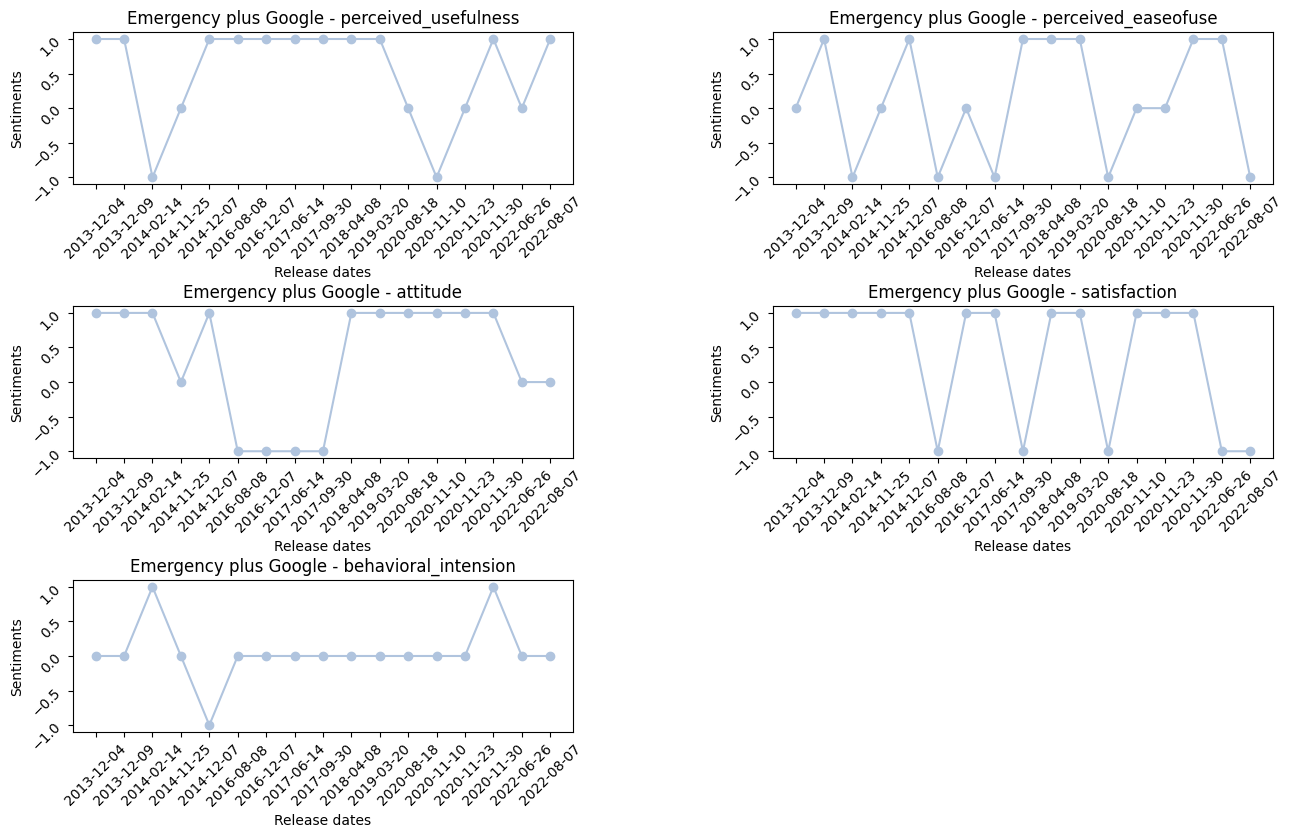

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime

df_emergencyplus_google_versions = pd.read_csv('./data/task3_4/task4/input/emergencyplus_version_details_google.csv') 
df_firstaid_google_vesions = pd.read_csv('./data/task3_4/task4/input/firstaid_version_details_google.csv')
df_emergencyplus_apple_versions = pd.read_csv('./data/task3_4/task4/input/emergencyplus_version_details_apple.csv') 
df_firstaid_apple_vesions = pd.read_csv('./data/task3_4/task4/input/firstaid_version_details_apple.csv')

def indexingDateCol(df):
    df['Date of Review']=pd.to_datetime(df['Date of Review'])
    df = df.set_index(df['Date of Review'])
    df = df.sort_index(ascending=False)
    
    return df


def sentimentPerReleasedate(df,version_df):
    sentiment_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
        else:
            df_new = df[dates[i]:dates[i-1]]
        
        sentiment_list.append(getFrequentSentiment(df_new))

    return sentiment_list

def getFrequentSentiment(df):
    sentiment = 0
    if(df.empty): #when particular range contains no values
        sentiment = 0 #assumption that average rating will be neural
    else:
        sentiment = df['sentiment'].mode()[0]

    return sentiment

def plotRating1(df,rating_list, ax,row, col, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[row][col].plot(dates, rating_list[::-1], **{'color': 'lightsteelblue', 'marker': 'o'})
    #plt.xticks(rotation = 45)
    ax[row][col].tick_params(labelrotation=45)
    ax[row][col].set_xlabel('Release dates') #for presentation purposes fontsize has increased
    ax[row][col].set_ylabel(ylabelName)
    #fig.autofmt_xdate()
    #fig.autofmt_xdate(rotation=45)
    
    
def plotRating2(df,rating_list, ax,row,ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[row].plot(dates, rating_list[::-1], **{'color': 'lightsteelblue', 'marker': 'o'})
    #plt.xticks(rotation = 45)
    ax[row].tick_params(labelrotation=45)
    ax[row].set_xlabel('Release dates') #for presentation purposes fontsize has increased
    ax[row].set_ylabel(ylabelName)
    #fig.autofmt_xdate()
    #fig.autofmt_xdate(rotation=45)
    
fig, ax = plt.subplots(3,2, figsize=(15,5))
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.8)

sentiment_list1 = sentimentPerReleasedate(df_emergency_google_PU, df_emergencyplus_google_versions)

ax[0][0].set_title('Emergency plus Google - perceived_usefulness')
plotRating1(df_emergencyplus_google_versions, sentiment_list1,ax,0,  0, "Sentiments")

sentiment_list2 = sentimentPerReleasedate(df_emergency_google_PE, df_emergencyplus_google_versions)
ax[0][1].set_title('Emergency plus Google - perceived_easeofuse')
plotRating1(df_emergencyplus_google_versions, sentiment_list2,ax,0,  1, "Sentiments")

sentiment_list3 = sentimentPerReleasedate(df_emergency_google_A, df_emergencyplus_google_versions)
ax[1][0].set_title('Emergency plus Google - attitude')
plotRating1(df_emergencyplus_google_versions, sentiment_list3,ax,1,  0, "Sentiments")

sentiment_list4 = sentimentPerReleasedate(df_emergency_google_S, df_emergencyplus_google_versions)
ax[1][1].set_title('Emergency plus Google - satisfaction')
plotRating1(df_emergencyplus_google_versions, sentiment_list4,ax,1,  1, "Sentiments")

sentiment_list5 = sentimentPerReleasedate(df_emergency_google_BI, df_emergencyplus_google_versions)
ax[2][0].set_title('Emergency plus Google - behavioral_intension')
plotRating1(df_emergencyplus_google_versions, sentiment_list5,ax,2,  0, "Sentiments")



ax[2,1].set_visible(False)

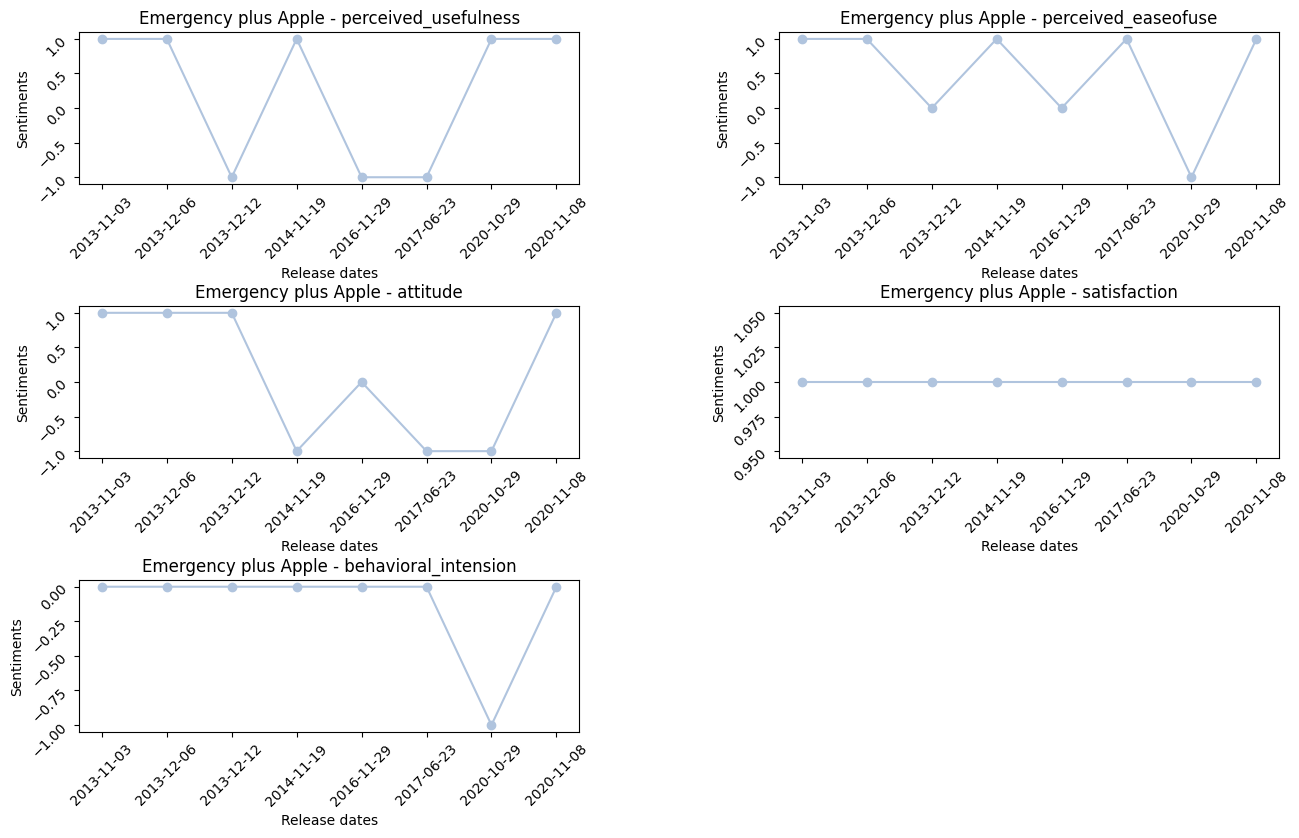

In [9]:
fig1, ax1 = plt.subplots(3,2, figsize=(15,5))
fig1.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.8)

sentiment_list6 = sentimentPerReleasedate(df_emergency_apple_PU, df_emergencyplus_apple_versions)

ax1[0][0].set_title('Emergency plus Apple - perceived_usefulness')
plotRating1(df_emergencyplus_apple_versions, sentiment_list6,ax1,0,  0, "Sentiments")

sentiment_list7 = sentimentPerReleasedate(df_emergency_apple_PE, df_emergencyplus_apple_versions)
ax1[0][1].set_title('Emergency plus Apple - perceived_easeofuse')
plotRating1(df_emergencyplus_apple_versions, sentiment_list7,ax1,0,  1, "Sentiments")

sentiment_list8 = sentimentPerReleasedate(df_emergency_apple_A, df_emergencyplus_apple_versions)
ax1[1][0].set_title('Emergency plus Apple - attitude')
plotRating1(df_emergencyplus_apple_versions, sentiment_list8,ax1,1,  0, "Sentiments")

sentiment_list9 = sentimentPerReleasedate(df_emergency_apple_S, df_emergencyplus_apple_versions)
ax1[1][1].set_title('Emergency plus Apple - satisfaction')
plotRating1(df_emergencyplus_apple_versions, sentiment_list9,ax1,1,  1, "Sentiments")

sentiment_list10 = sentimentPerReleasedate(df_emergency_apple_BI, df_emergencyplus_apple_versions)
ax1[2][0].set_title('Emergency plus Apple - behavioral_intension')
plotRating1(df_emergencyplus_apple_versions, sentiment_list10,ax1,2,  0, "Sentiments")



ax1[2,1].set_visible(False)

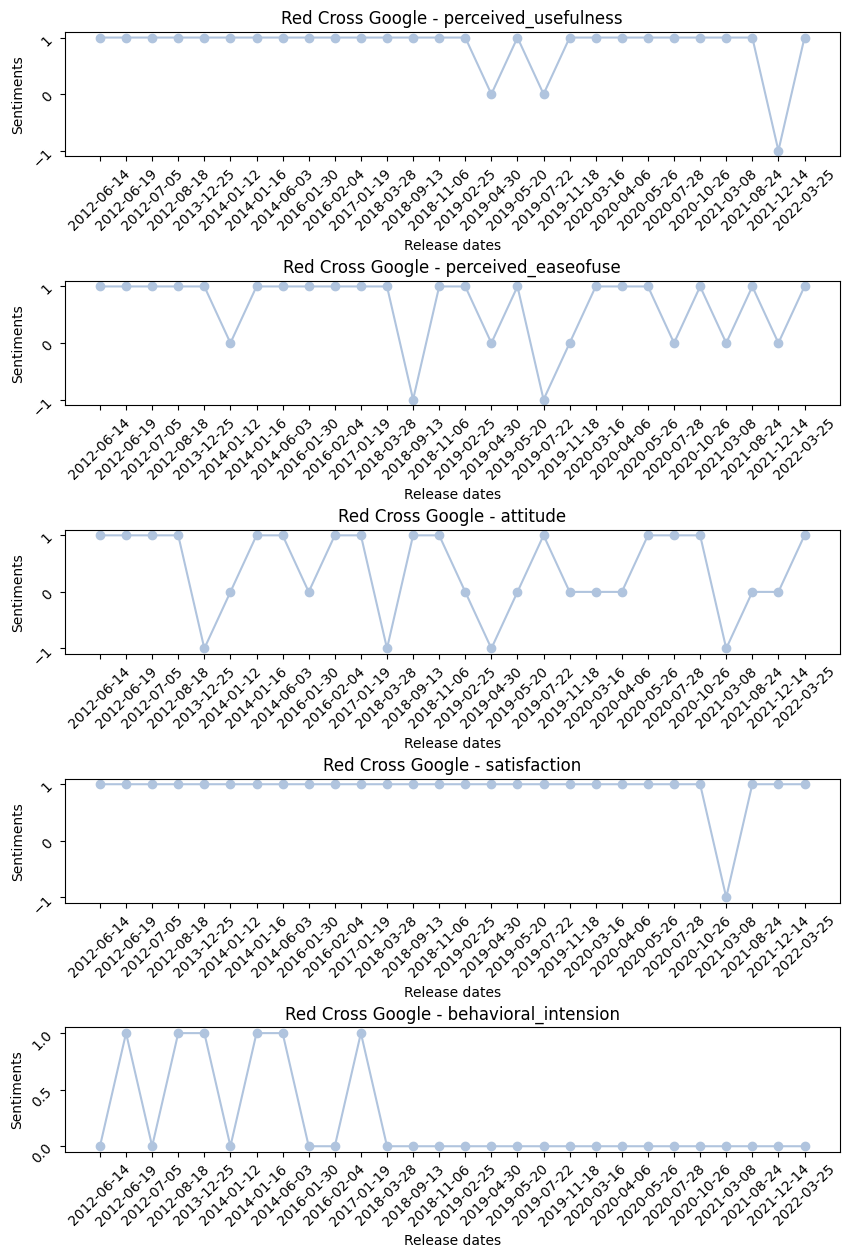

In [10]:
fig2, ax2 = plt.subplots(5, figsize=(10,8))

plt.subplots_adjust(bottom=0.1,
                    top=1.5,
                    hspace=1.0)

sentiment_list11 = sentimentPerReleasedate(df_firstaid_google_PU, df_firstaid_google_vesions)

ax2[0].set_title('Red Cross Google - perceived_usefulness')
plotRating2(df_firstaid_google_vesions, sentiment_list11,ax2,0, "Sentiments")

sentiment_list12 = sentimentPerReleasedate(df_firstaid_google_PE, df_firstaid_google_vesions)
ax2[1].set_title('Red Cross Google - perceived_easeofuse')
plotRating2(df_firstaid_google_vesions, sentiment_list12,ax2,1,  "Sentiments")

sentiment_list13 = sentimentPerReleasedate(df_firstaid_google_A, df_firstaid_google_vesions)
ax2[2].set_title('Red Cross Google - attitude')
plotRating2(df_firstaid_google_vesions, sentiment_list13,ax2,2,  "Sentiments")

sentiment_list14 = sentimentPerReleasedate(df_firstaid_google_S, df_firstaid_google_vesions)
ax2[3].set_title('Red Cross Google - satisfaction')
plotRating2(df_firstaid_google_vesions, sentiment_list14,ax2,3,   "Sentiments")

sentiment_list15 = sentimentPerReleasedate(df_firstaid_google_BI, df_firstaid_google_vesions)
ax2[4].set_title('Red Cross Google - behavioral_intension')
plotRating2(df_firstaid_google_vesions, sentiment_list15,ax2,4,  "Sentiments")



#ax2[2,1].set_visible(False)

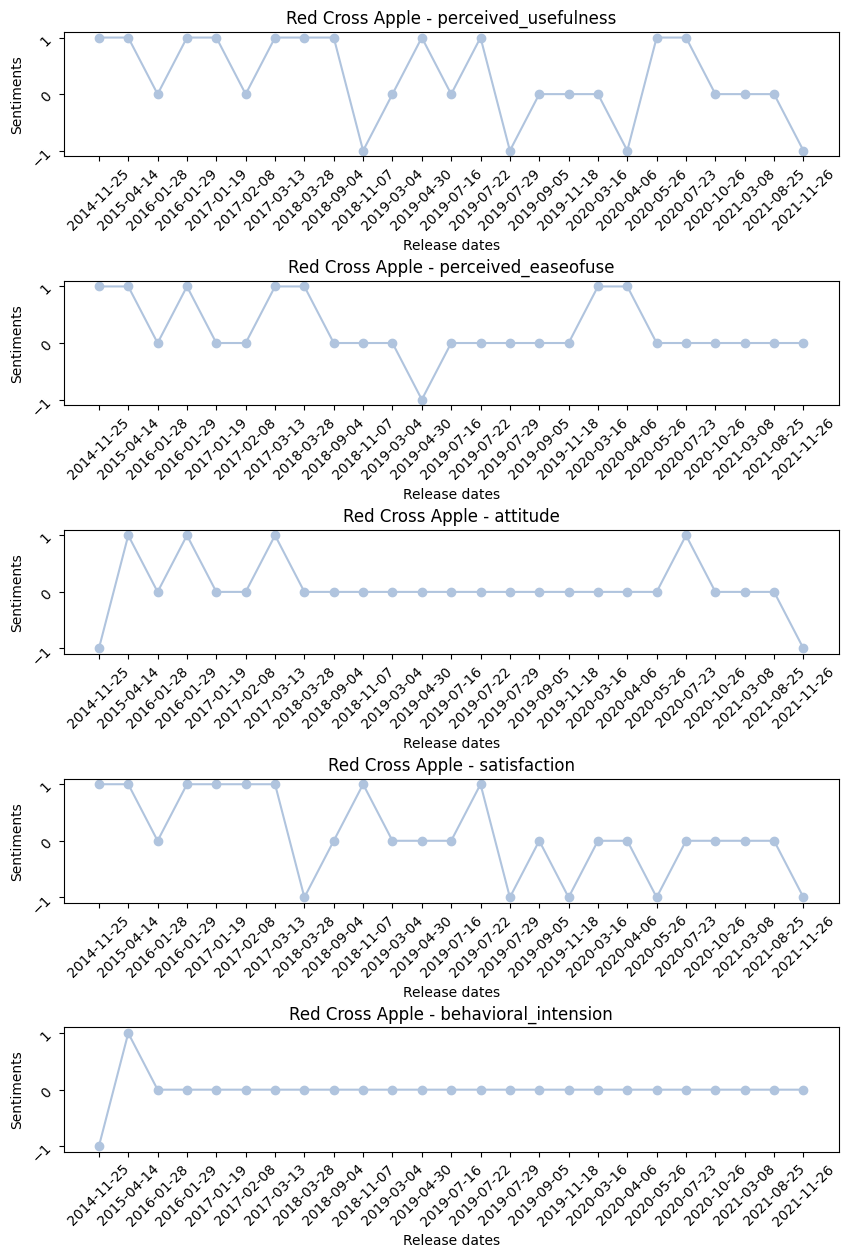

In [11]:
fig3, ax3 = plt.subplots(5, figsize=(10,8))

plt.subplots_adjust(bottom=0.1,
                    top=1.5,
                    hspace=1.0)

sentiment_list11 = sentimentPerReleasedate(df_firstaid_apple_PU, df_firstaid_apple_vesions)

ax3[0].set_title('Red Cross Apple - perceived_usefulness')
plotRating2(df_firstaid_apple_vesions, sentiment_list11,ax3,0, "Sentiments")

sentiment_list12 = sentimentPerReleasedate(df_firstaid_apple_PE, df_firstaid_apple_vesions)
ax3[1].set_title('Red Cross Apple - perceived_easeofuse')
plotRating2(df_firstaid_apple_vesions, sentiment_list12,ax3,1,  "Sentiments")

sentiment_list13 = sentimentPerReleasedate(df_firstaid_apple_A, df_firstaid_apple_vesions)
ax3[2].set_title('Red Cross Apple - attitude')
plotRating2(df_firstaid_apple_vesions, sentiment_list13,ax3,2,  "Sentiments")

sentiment_list14 = sentimentPerReleasedate(df_firstaid_apple_S, df_firstaid_apple_vesions)
ax3[3].set_title('Red Cross Apple - satisfaction')
plotRating2(df_firstaid_apple_vesions, sentiment_list14,ax3,3,   "Sentiments")

sentiment_list15 = sentimentPerReleasedate(df_firstaid_apple_BI, df_firstaid_apple_vesions)
ax3[4].set_title('Red Cross Apple - behavioral_intension')
plotRating2(df_firstaid_apple_vesions, sentiment_list15,ax3,4,  "Sentiments")

Ratings

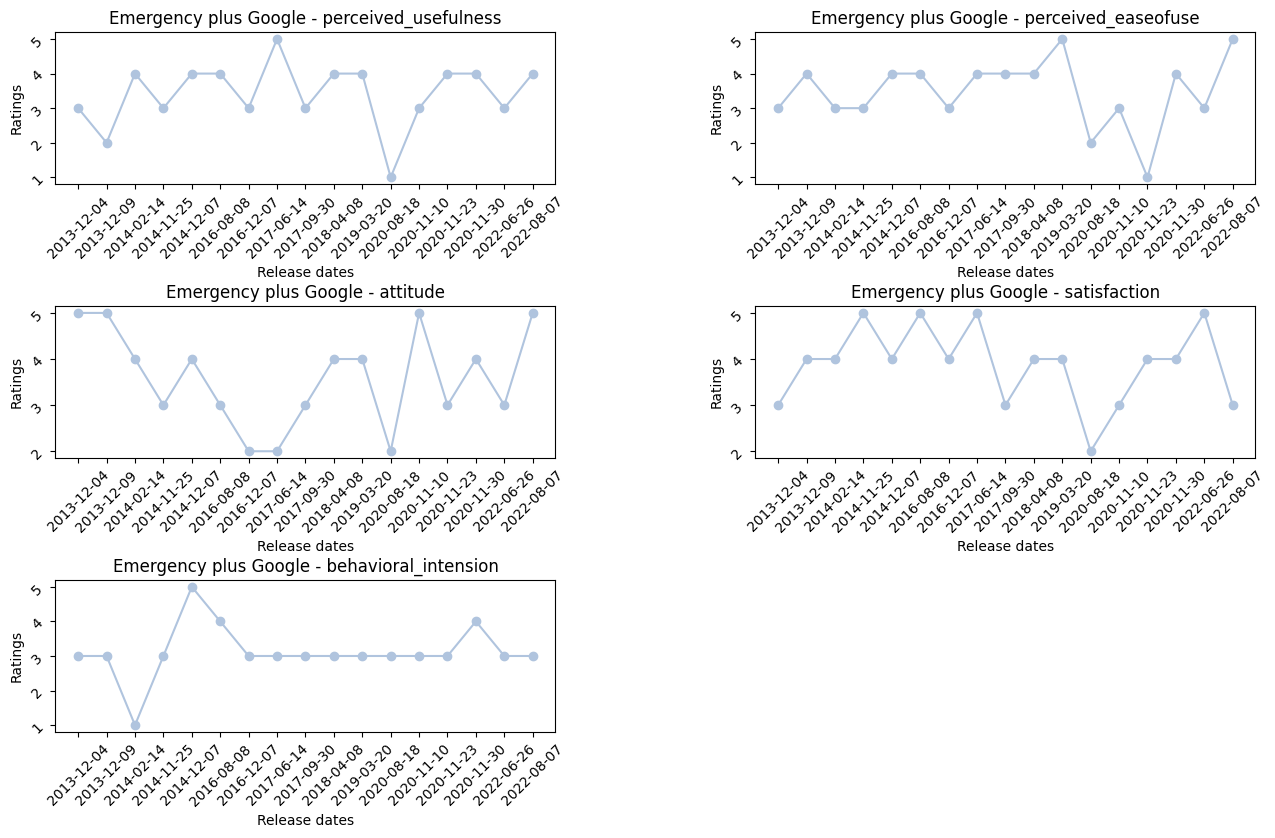

In [12]:
def averageRatingPerReleasedate(df,version_df):
    average_rating_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            
        else:
            df_new = df[dates[i]:dates[i-1]]
            
            
        average_rating_list.append(getAverageRating(df_new))

    return average_rating_list

def getAverageRating(df):
    mean = 0
    if(df.empty): #when particular range contains no values
        mean = 3 #assumption that average rating will be neural
    else:
        mean = round(df['Rating'].mean())
    return mean


fig, ax = plt.subplots(3,2, figsize=(15,5))
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.8)

rating_list1 = averageRatingPerReleasedate(df_emergency_google_PU, df_emergencyplus_google_versions)

ax[0][0].set_title('Emergency plus Google - perceived_usefulness')
plotRating1(df_emergencyplus_google_versions, rating_list1,ax,0,  0, "Ratings")

rating_list2 = averageRatingPerReleasedate(df_emergency_google_PE, df_emergencyplus_google_versions)
ax[0][1].set_title('Emergency plus Google - perceived_easeofuse')
plotRating1(df_emergencyplus_google_versions, rating_list2,ax,0,  1, "Ratings")

rating_list3 = averageRatingPerReleasedate(df_emergency_google_A, df_emergencyplus_google_versions)
ax[1][0].set_title('Emergency plus Google - attitude')
plotRating1(df_emergencyplus_google_versions, rating_list3,ax,1,  0, "Ratings")

rating_list4 = averageRatingPerReleasedate(df_emergency_google_S, df_emergencyplus_google_versions)
ax[1][1].set_title('Emergency plus Google - satisfaction')
plotRating1(df_emergencyplus_google_versions, rating_list4,ax,1,  1, "Ratings")

rating_list5 = averageRatingPerReleasedate(df_emergency_google_BI, df_emergencyplus_google_versions)
ax[2][0].set_title('Emergency plus Google - behavioral_intension')
plotRating1(df_emergencyplus_google_versions, rating_list5,ax,2,  0, "Ratings")



ax[2,1].set_visible(False)


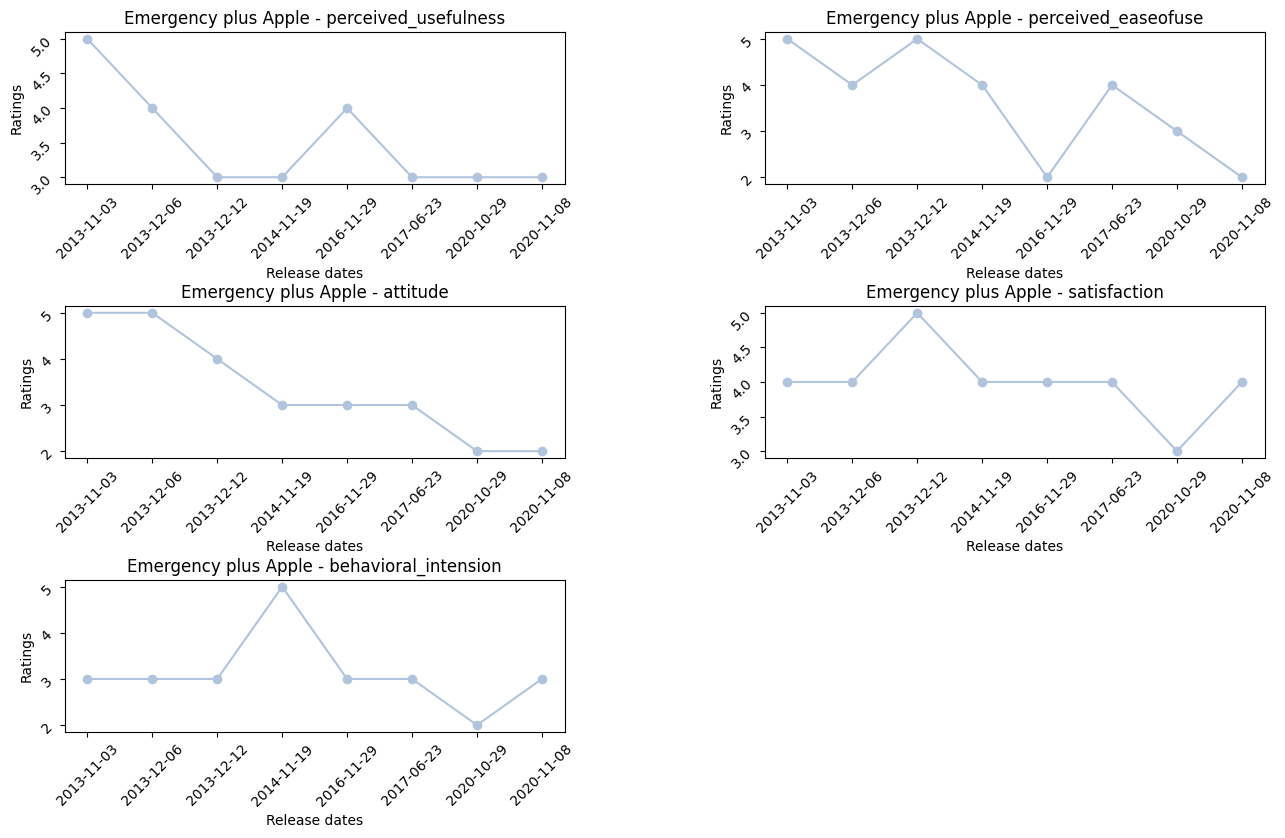

In [13]:
fig1, ax1 = plt.subplots(3,2, figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.8)


rating_list6 = averageRatingPerReleasedate(df_emergency_apple_PU, df_emergencyplus_apple_versions)

ax1[0][0].set_title('Emergency plus Apple - perceived_usefulness')
plotRating1(df_emergencyplus_apple_versions, rating_list6,ax1,0,  0, "Ratings")

rating_list7 = averageRatingPerReleasedate(df_emergency_apple_PE, df_emergencyplus_apple_versions)
ax1[0][1].set_title('Emergency plus Apple - perceived_easeofuse')
plotRating1(df_emergencyplus_apple_versions, rating_list7,ax1,0,  1, "Ratings")

rating_list8 = averageRatingPerReleasedate(df_emergency_apple_A, df_emergencyplus_apple_versions)
ax1[1][0].set_title('Emergency plus Apple - attitude')
plotRating1(df_emergencyplus_apple_versions, rating_list8,ax1,1,  0, "Ratings")

rating_list9 = averageRatingPerReleasedate(df_emergency_apple_S, df_emergencyplus_apple_versions)
ax1[1][1].set_title('Emergency plus Apple - satisfaction')
plotRating1(df_emergencyplus_apple_versions, rating_list9,ax1,1,  1, "Ratings")

rating_list10 = averageRatingPerReleasedate(df_emergency_apple_BI, df_emergencyplus_apple_versions)
ax1[2][0].set_title('Emergency plus Apple - behavioral_intension')
plotRating1(df_emergencyplus_apple_versions, rating_list10,ax1,2,  0, "Ratings")



ax1[2,1].set_visible(False)

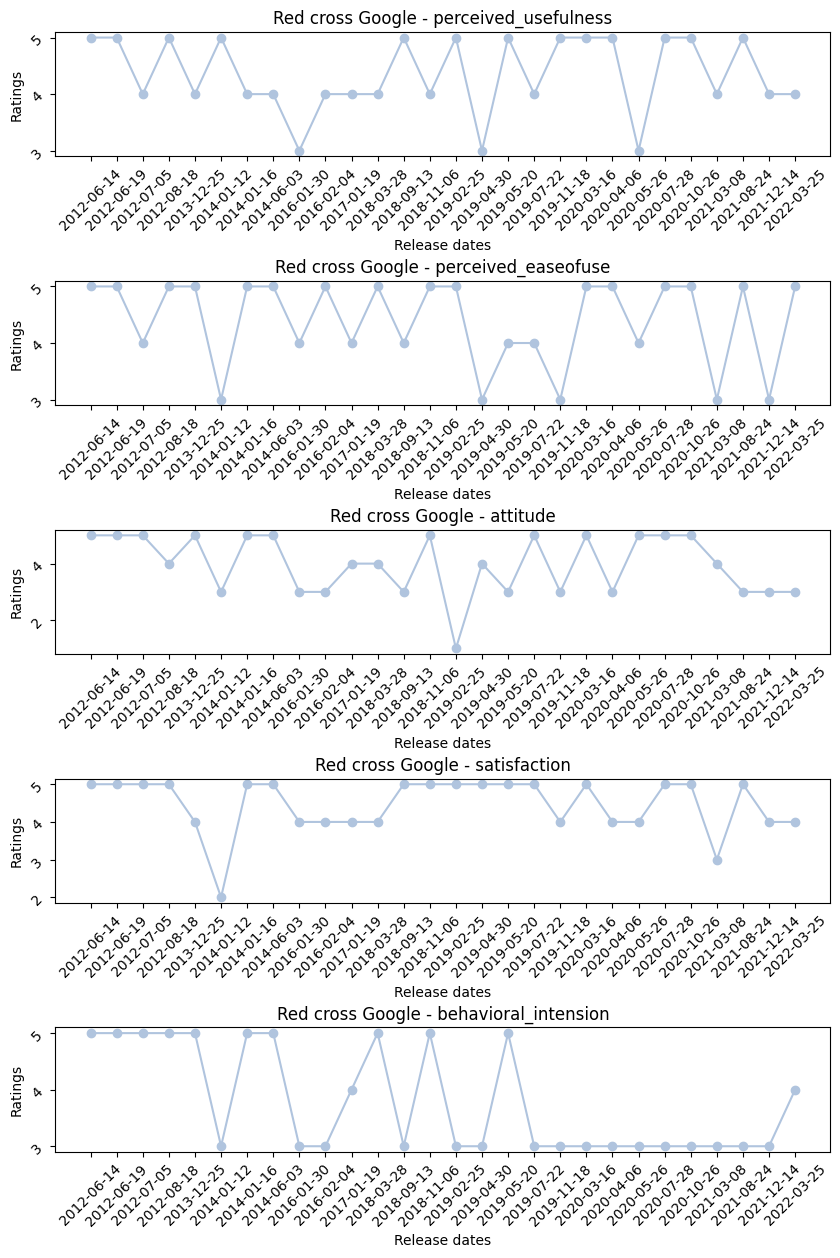

In [14]:
fig2, ax2 = plt.subplots(5, figsize=(10,8))
plt.subplots_adjust(bottom=0.1,
                    top=1.5,
                    hspace=1.0)


rating_list11 = averageRatingPerReleasedate(df_firstaid_google_PU, df_firstaid_google_vesions)

ax2[0].set_title('Red cross Google - perceived_usefulness')
plotRating2(df_firstaid_google_vesions, rating_list11,ax2,0,  "Ratings")

rating_list12 = averageRatingPerReleasedate(df_firstaid_google_PE, df_firstaid_google_vesions)
ax2[1].set_title('Red cross Google - perceived_easeofuse')
plotRating2(df_firstaid_google_vesions, rating_list12,ax2,1,   "Ratings")

rating_list13 = averageRatingPerReleasedate(df_firstaid_google_A, df_firstaid_google_vesions)
ax2[2].set_title('Red cross Google - attitude')
plotRating2(df_firstaid_google_vesions, rating_list13,ax2,2,  "Ratings")

rating_list14 = averageRatingPerReleasedate(df_firstaid_google_S, df_firstaid_google_vesions)
ax2[3].set_title('Red cross Google - satisfaction')
plotRating2(df_firstaid_google_vesions, rating_list14,ax2,3,   "Ratings")

rating_list15 = averageRatingPerReleasedate(df_firstaid_google_BI, df_firstaid_google_vesions)
ax2[4].set_title('Red cross Google - behavioral_intension')
plotRating2(df_firstaid_google_vesions, rating_list15,ax2,4,   "Ratings")



# ax2[2,1].set_visible(False)

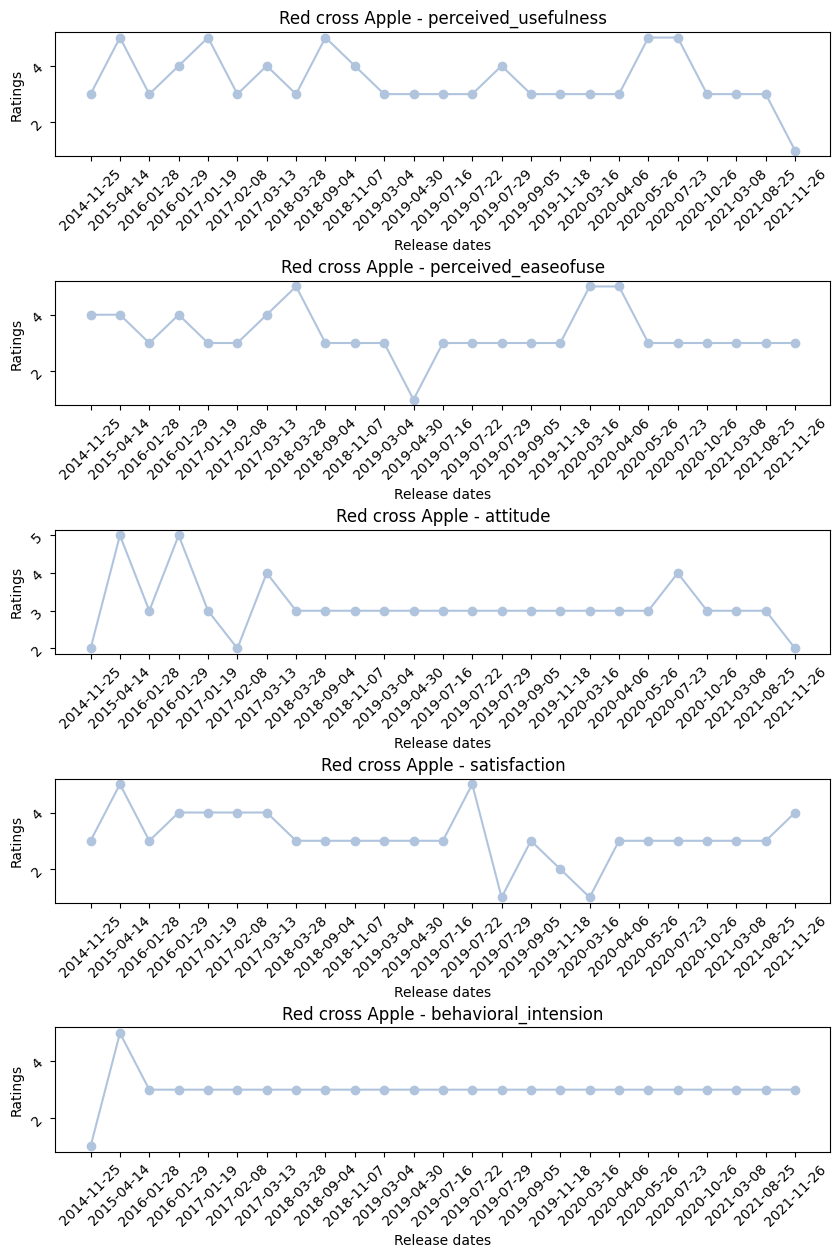

In [15]:
fig3, ax3 = plt.subplots(5, figsize=(10,8))
plt.subplots_adjust(bottom=0.1,
                    top=1.5,
                    hspace=1.0)

rating_list16 = averageRatingPerReleasedate(df_firstaid_apple_PU, df_firstaid_apple_vesions)

ax3[0].set_title('Red cross Apple - perceived_usefulness')
plotRating2(df_firstaid_apple_vesions, rating_list16,ax3,0, "Ratings")

rating_list17 = averageRatingPerReleasedate(df_firstaid_apple_PE, df_firstaid_apple_vesions)
ax3[1].set_title('Red cross Apple - perceived_easeofuse')
plotRating2(df_firstaid_apple_vesions, rating_list17,ax3,1,"Ratings")

rating_list18 = averageRatingPerReleasedate(df_firstaid_apple_A, df_firstaid_apple_vesions)
ax3[2].set_title('Red cross Apple - attitude')
plotRating2(df_firstaid_apple_vesions, rating_list18,ax3,2, "Ratings")

rating_list19 = averageRatingPerReleasedate(df_firstaid_apple_S, df_firstaid_apple_vesions)
ax3[3].set_title('Red cross Apple - satisfaction')
plotRating2(df_firstaid_apple_vesions, rating_list19,ax3,3, "Ratings")

rating_list20 = averageRatingPerReleasedate(df_firstaid_apple_BI, df_firstaid_apple_vesions)
ax3[4].set_title('Red cross Apple - behavioral_intension')
plotRating2(df_firstaid_apple_vesions, rating_list20,ax3,4, "Ratings")



#ax3[2,1].set_visible(False)

#### These are the combined new charts - ratings and sentiments (used in the report)

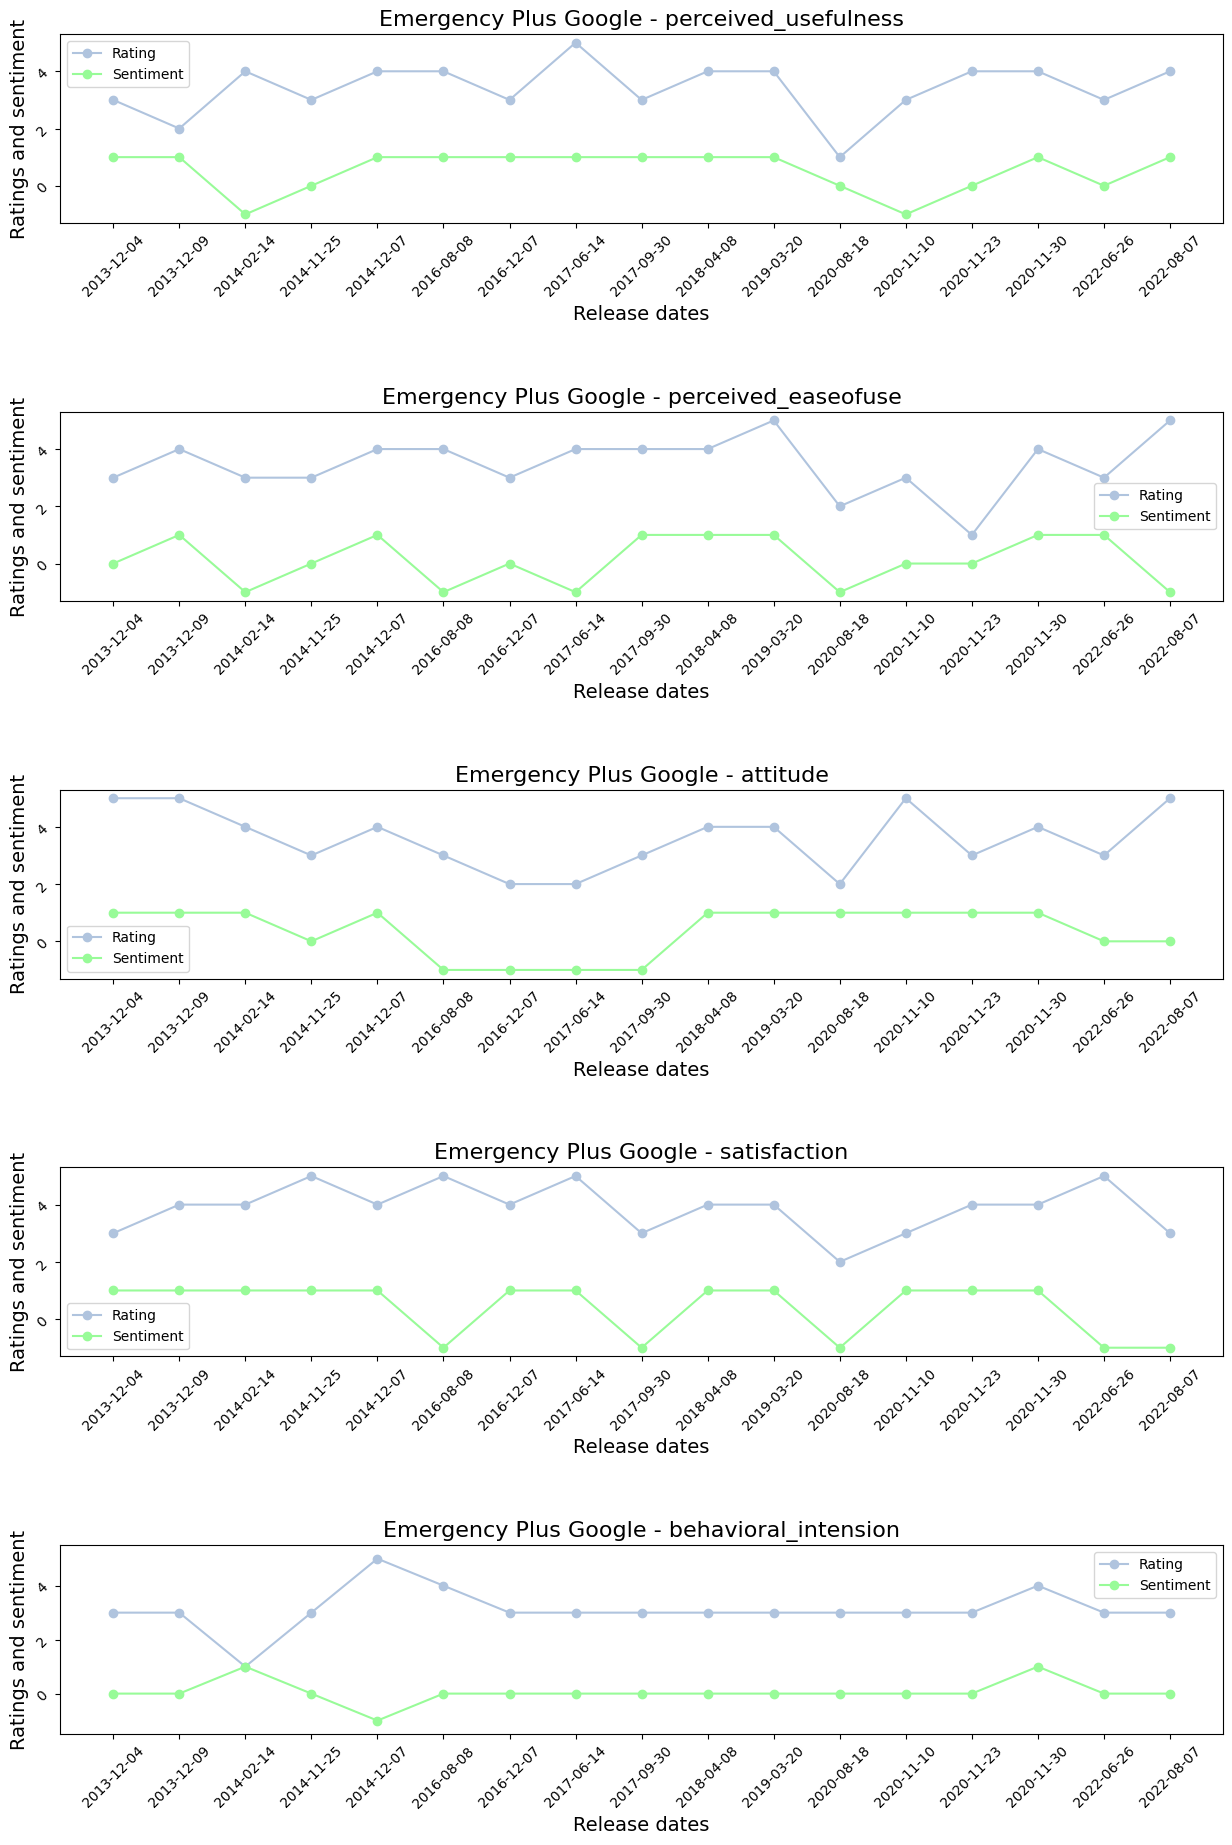

In [16]:
def plotRating3(df, y1list, y2list, ax, row, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[row].plot(dates, y1list[::-1], 'C1', label='Rating', **{'color': 'lightsteelblue' , 'marker': 'o'})
    ax[row].plot(dates, y2list[::-1], 'C2', label='Sentiment', **{'color': 'palegreen', 'marker': 'o'})
    #plt.xticks(rotation = 45)
    ax[row].tick_params(labelrotation=45)
    ax[row].set_xlabel('Release dates', fontsize = 14) #for presentation purposes fontsize has increased
    ax[row].set_ylabel(ylabelName,fontsize = 14)
    ax[row].legend()
    #fig.autofmt_xdate()
    #fig.autofmt_xdate(rotation=45)
    plt.ylim([-1.5, 5.5])


fig, ax = plt.subplots(5, figsize=(15,5))
# fig.tight_layout()
plt.subplots_adjust(bottom=0.1,
                    top=3.5,
                    hspace=1.0)

rating_list1 = averageRatingPerReleasedate(df_emergency_google_PU, df_emergencyplus_google_versions)
sentiment_list1 = sentimentPerReleasedate(df_emergency_google_PU, df_emergencyplus_google_versions)
ax[0].set_title('Emergency Plus Google - perceived_usefulness', fontsize = 16)
plotRating3(df_emergencyplus_google_versions, rating_list1, sentiment_list1,ax,0, "Ratings and sentiment")
#plotRating3(df_emergencyplus_apple_versions, sentiment_list1,ax,0, "Ratings and sentiment", "palegreen")

rating_list2 = averageRatingPerReleasedate(df_emergency_google_PE, df_emergencyplus_google_versions)
sentiment_list2 = sentimentPerReleasedate(df_emergency_google_PE, df_emergencyplus_google_versions)
ax[1].set_title('Emergency Plus Google - perceived_easeofuse', fontsize = 16)
plotRating3(df_emergencyplus_google_versions, rating_list2, sentiment_list2,ax,1, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list3 = averageRatingPerReleasedate(df_emergency_google_A, df_emergencyplus_google_versions)
sentiment_list3 = sentimentPerReleasedate(df_emergency_google_A, df_emergencyplus_google_versions)
ax[2].set_title('Emergency Plus Google - attitude', fontsize = 16)
plotRating3(df_emergencyplus_google_versions, rating_list3, sentiment_list3,ax,2, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list4 = averageRatingPerReleasedate(df_emergency_google_S, df_emergencyplus_google_versions)
sentiment_list4 = sentimentPerReleasedate(df_emergency_google_S, df_emergencyplus_google_versions)
ax[3].set_title('Emergency Plus Google - satisfaction', fontsize = 16)
plotRating3(df_emergencyplus_google_versions, rating_list4, sentiment_list4,ax,3, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list5 = averageRatingPerReleasedate(df_emergency_google_BI, df_emergencyplus_google_versions)
sentiment_list5 = sentimentPerReleasedate(df_emergency_google_BI, df_emergencyplus_google_versions)
ax[4].set_title('Emergency Plus Google - behavioral_intension', fontsize = 16)
plotRating3(df_emergencyplus_google_versions, rating_list5, sentiment_list5,ax,4, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")



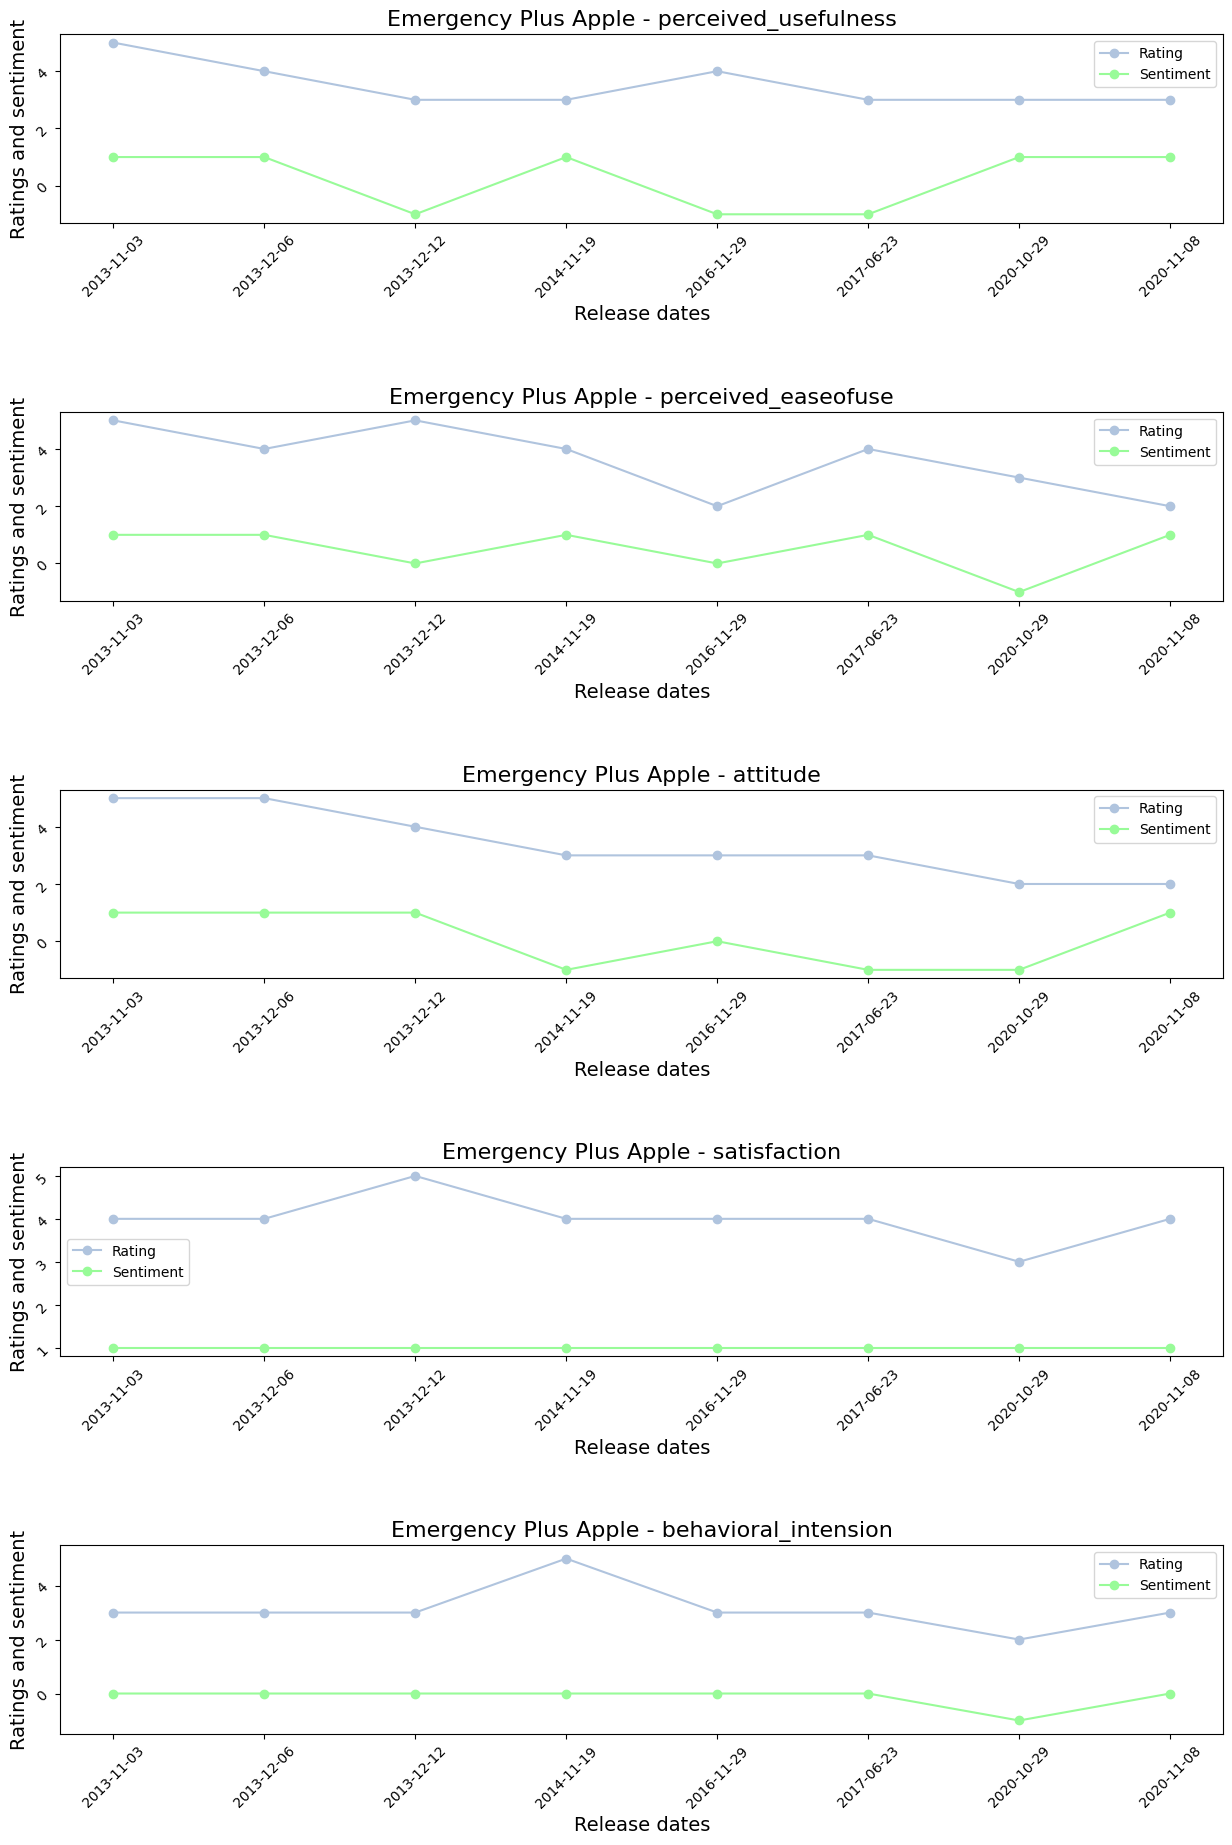

In [17]:
fig, ax = plt.subplots(5, figsize=(15,5))
# fig.tight_layout()
plt.subplots_adjust(bottom=0.1,
                    top=3.5,
                    hspace=1.0)

rating_list1 = averageRatingPerReleasedate(df_emergency_apple_PU, df_emergencyplus_apple_versions)
sentiment_list1 = sentimentPerReleasedate(df_emergency_apple_PU, df_emergencyplus_apple_versions)
ax[0].set_title('Emergency Plus Apple - perceived_usefulness', fontsize = 16)
plotRating3(df_emergencyplus_apple_versions, rating_list1, sentiment_list1,ax,0, "Ratings and sentiment")
#plotRating3(df_emergencyplus_apple_versions, sentiment_list1,ax,0, "Ratings and sentiment", "palegreen")

rating_list2 = averageRatingPerReleasedate(df_emergency_apple_PE, df_emergencyplus_apple_versions)
sentiment_list2 = sentimentPerReleasedate(df_emergency_apple_PE, df_emergencyplus_apple_versions)
ax[1].set_title('Emergency Plus Apple - perceived_easeofuse', fontsize = 16)
plotRating3(df_emergencyplus_apple_versions, rating_list2, sentiment_list2,ax,1, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list3 = averageRatingPerReleasedate(df_emergency_apple_A, df_emergencyplus_apple_versions)
sentiment_list3 = sentimentPerReleasedate(df_emergency_apple_A, df_emergencyplus_apple_versions)
ax[2].set_title('Emergency Plus Apple - attitude', fontsize = 16)
plotRating3(df_emergencyplus_apple_versions, rating_list3, sentiment_list3,ax,2, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list4 = averageRatingPerReleasedate(df_emergency_apple_S, df_emergencyplus_apple_versions)
sentiment_list4 = sentimentPerReleasedate(df_emergency_apple_S, df_emergencyplus_apple_versions)
ax[3].set_title('Emergency Plus Apple - satisfaction', fontsize = 16)
plotRating3(df_emergencyplus_apple_versions, rating_list4, sentiment_list4,ax,3, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list5 = averageRatingPerReleasedate(df_emergency_apple_BI, df_emergencyplus_apple_versions)
sentiment_list5 = sentimentPerReleasedate(df_emergency_apple_BI, df_emergencyplus_apple_versions)
ax[4].set_title('Emergency Plus Apple - behavioral_intension', fontsize = 16)
plotRating3(df_emergencyplus_apple_versions, rating_list5, sentiment_list5,ax,4, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")


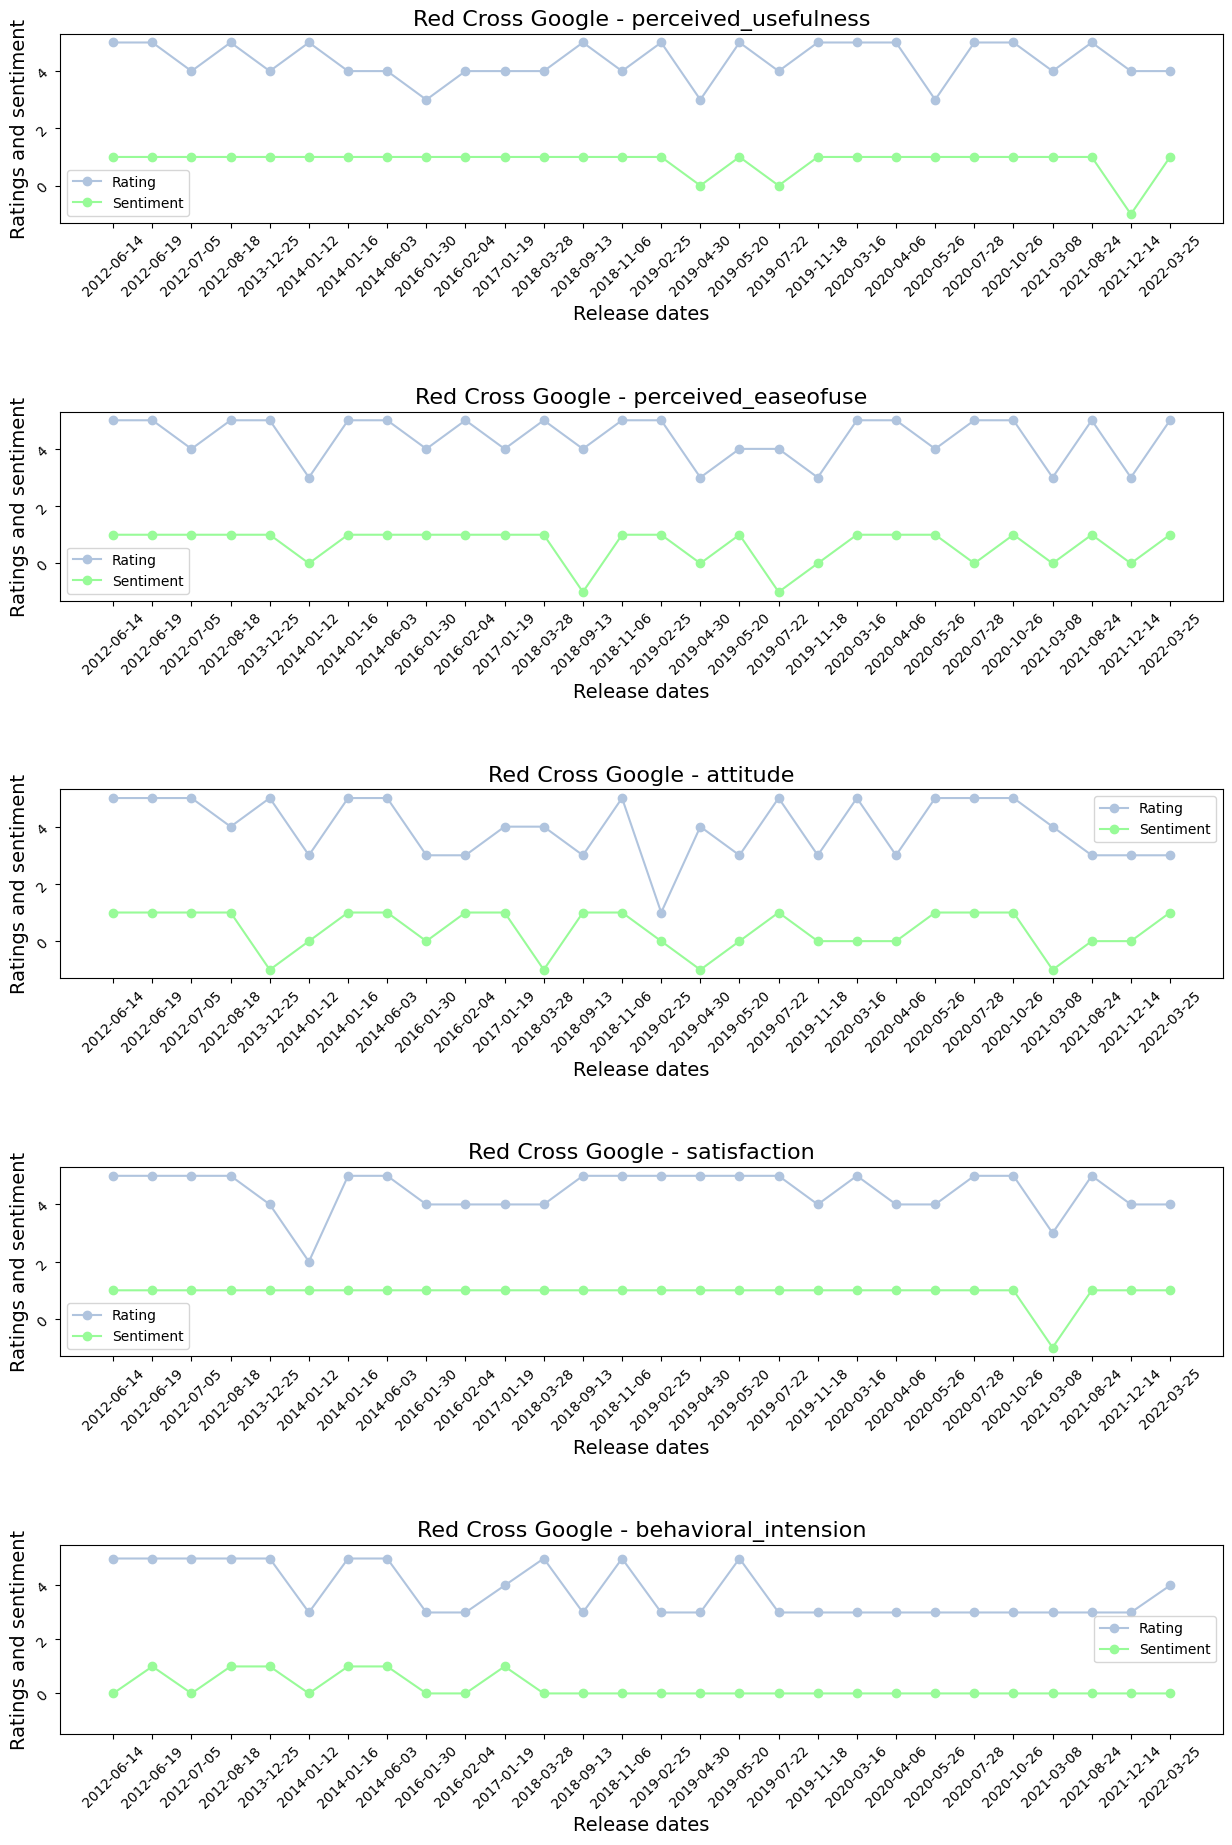

In [18]:
fig, ax = plt.subplots(5, figsize=(15,5))
# fig.tight_layout()
plt.subplots_adjust(bottom=0.1,
                    top=3.5,
                    hspace=1.0)

rating_list1 = averageRatingPerReleasedate(df_firstaid_google_PU, df_firstaid_google_vesions)
sentiment_list1 = sentimentPerReleasedate(df_firstaid_google_PU, df_firstaid_google_vesions)
ax[0].set_title('Red Cross Google - perceived_usefulness',fontsize = 16)
plotRating3(df_firstaid_google_vesions, rating_list1, sentiment_list1,ax,0, "Ratings and sentiment")
#plotRating3(df_emergencyplus_apple_versions, sentiment_list1,ax,0, "Ratings and sentiment", "palegreen")

rating_list2 = averageRatingPerReleasedate(df_firstaid_google_PE, df_firstaid_google_vesions)
sentiment_list2 = sentimentPerReleasedate(df_firstaid_google_PE, df_firstaid_google_vesions)
ax[1].set_title('Red Cross Google - perceived_easeofuse',fontsize = 16)
plotRating3(df_firstaid_google_vesions, rating_list2, sentiment_list2,ax,1, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list3 = averageRatingPerReleasedate(df_firstaid_google_A, df_firstaid_google_vesions)
sentiment_list3 = sentimentPerReleasedate(df_firstaid_google_A, df_firstaid_google_vesions)
ax[2].set_title('Red Cross Google - attitude',fontsize = 16)
plotRating3(df_firstaid_google_vesions, rating_list3, sentiment_list3,ax,2, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list4 = averageRatingPerReleasedate(df_firstaid_google_S, df_firstaid_google_vesions)
sentiment_list4 = sentimentPerReleasedate(df_firstaid_google_S, df_firstaid_google_vesions)
ax[3].set_title('Red Cross Google - satisfaction',fontsize = 16)
plotRating3(df_firstaid_google_vesions, rating_list4, sentiment_list4,ax,3, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list5 = averageRatingPerReleasedate(df_firstaid_google_BI, df_firstaid_google_vesions)
sentiment_list5 = sentimentPerReleasedate(df_firstaid_google_BI, df_firstaid_google_vesions)
ax[4].set_title('Red Cross Google - behavioral_intension',fontsize = 16)
plotRating3(df_firstaid_google_vesions, rating_list5, sentiment_list5,ax,4, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")


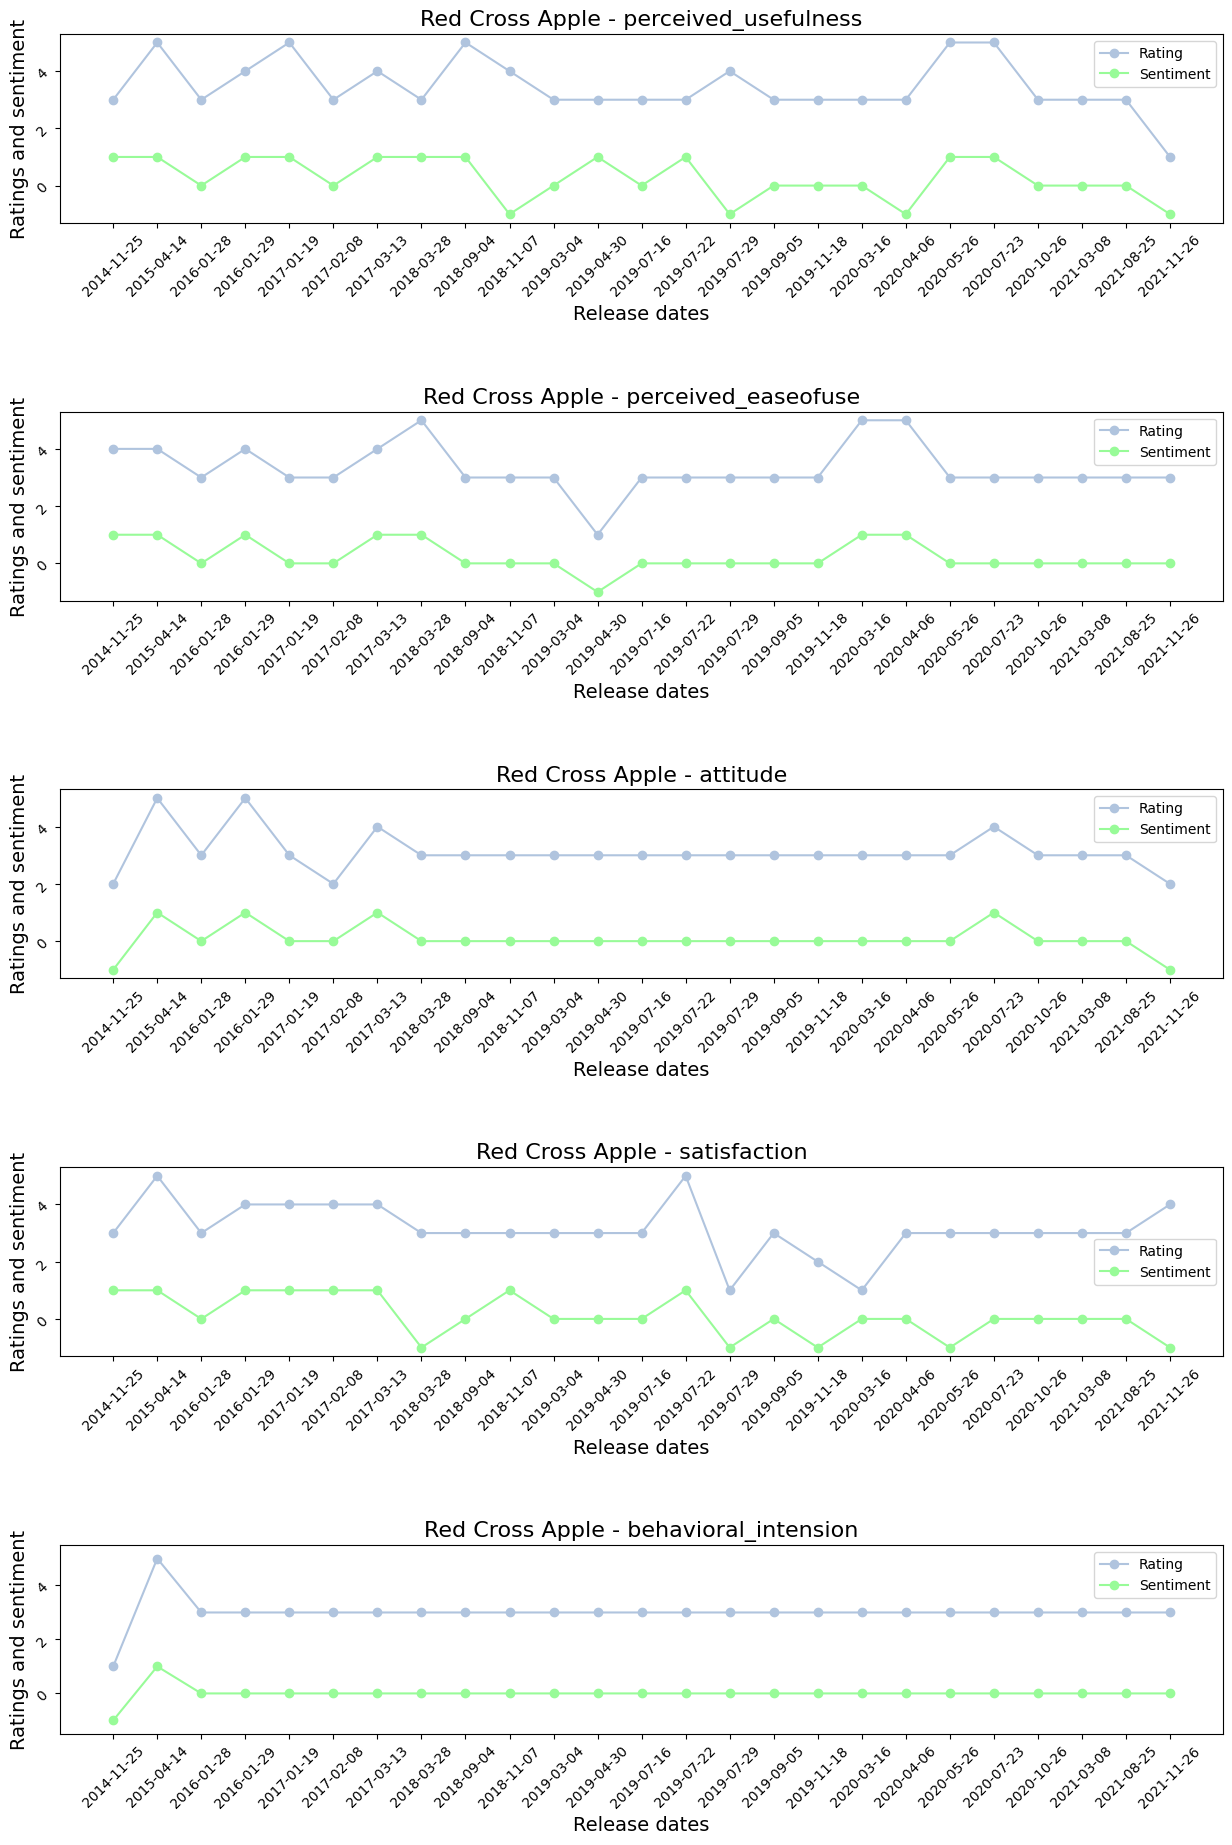

In [19]:
fig, ax = plt.subplots(5, figsize=(15,5))
# fig.tight_layout()
plt.subplots_adjust(bottom=0.1,
                    top=3.5,
                    hspace=1.0)

rating_list1 = averageRatingPerReleasedate(df_firstaid_apple_PU, df_firstaid_apple_vesions)
sentiment_list1 = sentimentPerReleasedate(df_firstaid_apple_PU, df_firstaid_apple_vesions)
ax[0].set_title('Red Cross Apple - perceived_usefulness',fontsize = 16)
plotRating3(df_firstaid_apple_vesions, rating_list1, sentiment_list1,ax,0, "Ratings and sentiment")
#plotRating3(df_emergencyplus_apple_versions, sentiment_list1,ax,0, "Ratings and sentiment", "palegreen")

rating_list2 = averageRatingPerReleasedate(df_firstaid_apple_PE, df_firstaid_apple_vesions)
sentiment_list2 = sentimentPerReleasedate(df_firstaid_apple_PE, df_firstaid_apple_vesions)
ax[1].set_title('Red Cross Apple - perceived_easeofuse',fontsize = 16)
plotRating3(df_firstaid_apple_vesions, rating_list2, sentiment_list2,ax,1, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list3 = averageRatingPerReleasedate(df_firstaid_apple_A, df_firstaid_apple_vesions)
sentiment_list3 = sentimentPerReleasedate(df_firstaid_apple_A, df_firstaid_apple_vesions)
ax[2].set_title('Red Cross Apple - attitude',fontsize = 16)
plotRating3(df_firstaid_apple_vesions, rating_list3, sentiment_list3,ax,2, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list4 = averageRatingPerReleasedate(df_firstaid_apple_S, df_firstaid_apple_vesions)
sentiment_list4 = sentimentPerReleasedate(df_firstaid_apple_S, df_firstaid_apple_vesions)
ax[3].set_title('Red Cross Apple - satisfaction',fontsize = 16)
plotRating3(df_firstaid_apple_vesions, rating_list4, sentiment_list4,ax,3, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")

rating_list5 = averageRatingPerReleasedate(df_firstaid_apple_BI, df_firstaid_apple_vesions)
sentiment_list5 = sentimentPerReleasedate(df_firstaid_apple_BI, df_firstaid_apple_vesions)
ax[4].set_title('Red Cross Apple - behavioral_intension',fontsize = 16)
plotRating3(df_firstaid_apple_vesions, rating_list5, sentiment_list5,ax,4, "Ratings and sentiment")#plotRating3(df_emergencyplus_apple_versions, rating_list6,ax,0, "Ratings and normalized sentiment", "palegreen")


### Pearson correlation

In [20]:
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec

from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

model = Word2Vec(lee_corpus_list, vector_size=24, epochs=100)
word_vectors = model.wv

In [21]:
#import nltk
from fuzzywuzzy import fuzz

#creating files which contains similarity values between each combination of keyword lists and store separately
def createFile(A, B, name):
    with open("./data/task7/output/" +name+'.txt', 'w') as f:
        for x in A:
            for y in B:
                d = fuzz.ratio(x, y)
                f.write(x + '  ,  ' + y + '  ,  ' + str(d) + '\n')

                
createFile(Keyword_perceived_usefulness , Keyword_perceived_easyofuse , "PU_PE")
createFile(Keyword_perceived_usefulness , Keywords_attitude  , "PU_A")
createFile(Keyword_perceived_usefulness , Keywords_satisfaction , "PU_S")
createFile(Keyword_perceived_usefulness , Keywords_behvioural_intention  , "PU_BI")
createFile(Keyword_perceived_easyofuse , Keywords_attitude  , "PE_A")
createFile(Keyword_perceived_easyofuse , Keywords_satisfaction , "PE_S")
createFile(Keyword_perceived_easyofuse , Keywords_behvioural_intention , "PE_BI")
createFile(Keywords_attitude  , Keywords_satisfaction , "A_S")
createFile(Keywords_attitude  , Keywords_behvioural_intention , "A_BI")
createFile(Keywords_satisfaction , Keywords_behvioural_intention , "S_BI")


In [22]:
#finding the correlation value and the p value

similarities1 = model.wv.evaluate_word_pairs('./data/task7/output/PU_PE.txt', '  ,  ')
print(similarities1)
print("PU_PE statistic: ", similarities1[0].statistic)
print("PU_PE p-value: ", similarities1[0].pvalue)

similarities2 = model.wv.evaluate_word_pairs('./data/task7/output/PU_A.txt', '  ,  ')
print("\nPU_A statistic: ", similarities2[0].statistic)
print("PU_A p-value: ", similarities2[0].pvalue)

similarities3 = model.wv.evaluate_word_pairs('./data/task7/output/PU_S.txt', '  ,  ')
print("\nPU_S statistic: ", similarities3[0].statistic)
print("PU_S p-value: ", similarities3[0].pvalue)

similarities4 = model.wv.evaluate_word_pairs('./data/task7/output/PU_BI.txt', '  ,  ')
print("\nPU_BI statistic: ", similarities4[0].statistic)
print("PU_BI p-value: ", similarities4[0].pvalue)

similarities5 = model.wv.evaluate_word_pairs('./data/task7/output/PE_A.txt', '  ,  ')
print("\nPE_A statistic: ", similarities5[0].statistic)
print("PE_A p-value: ", similarities5[0].pvalue)

similarities6 = model.wv.evaluate_word_pairs('./data/task7/output/PE_S.txt', '  ,  ')
print("\nPE_S statistic: ", similarities6[0].statistic)
print("PE_S p-value: ", similarities6[0].pvalue)

similarities7 = model.wv.evaluate_word_pairs('./data/task7/output/PE_BI.txt', '  ,  ')
print("\nPE_BI statistic: ", similarities7[0].statistic)
print("PE_BI p-value: ", similarities7[0].pvalue)

similarities8 = model.wv.evaluate_word_pairs('./data/task7/output/A_S.txt', '  ,  ')
print("\nA_S statistic: ", similarities8[0].statistic)
print("A_S p-value: ", similarities8[0].pvalue)

similarities9 = model.wv.evaluate_word_pairs('./data/task7/output/A_BI.txt', '  ,  ')
print("\nA_BI statistic: ", similarities9[0].statistic)
print("A_BI p-value: ", similarities9[0].pvalue)

similarities10 = model.wv.evaluate_word_pairs('./data/task7/output/S_BI.txt', '  ,  ')
print("\nS_BI statistic: ", similarities10[0].statistic)
print("S_BI p-value: ", similarities10[0].pvalue)


(PearsonRResult(statistic=-0.34409658079425964, pvalue=0.5042260690995358), SpearmanrResult(correlation=-0.14494275891311212, pvalue=0.7841083696021082), 98.83040935672514)
PU_PE statistic:  -0.34409658079425964
PU_PE p-value:  0.5042260690995358

PU_A statistic:  -0.21434513916054582
PU_A p-value:  0.5520748134401393

PU_S statistic:  -0.06985857165252286
PU_S p-value:  0.8953826051216549

PU_BI statistic:  1.0
PU_BI p-value:  1.0

PE_A statistic:  -0.1675184266466668
PE_A p-value:  0.5506726549508026

PE_S statistic:  -0.21272334159193138
PE_S p-value:  0.582654192469828

PE_BI statistic:  0.023069398405598004
PE_BI p-value:  0.9853122618464901

A_S statistic:  -0.22258212091993984
A_S p-value:  0.42524837440110064

A_BI statistic:  -0.43450732052343527
A_BI p-value:  0.4647058024661533

S_BI statistic:  -0.5270055041926814
S_BI p-value:  0.64662943124526


In [23]:
#concatenate data from combined csvs (emergency and redcross - apple and google data has concatenated beforehand)

df1 = pd.read_csv('./data/task3_4/task3/output/emergencyplus_combined_sentiment.csv') 
df2 = pd.read_csv('./data/task3_4/task3/output/firstaid_combined_sentiment.csv') 

df1["df"] = 1
df2["df"] = 2
df = pd.concat([df1, df2])

In [24]:
df

,Unnamed: 0,Review Id,User Name,Review,Rating,Date of Review,reviewCreatedVersion,sentiment,df
0,0,95aacdd5-af0f-4677-9fb1-53cd69385ff8,Tom Wilson,Gives wrong address so how do I know the rest ...,2,2022-10-25,NaN,-1,1
1,1,390ba2ce-88c2-44a9-b2e4-32c8f2bfbd54,R Johnston,Locates correctly but can give an address 800m...,3,2022-10-24,2.34,-1,1
2,2,bf4a9ce6-6252-4d4e-8bef-4bb20e12100c,Gabriel Berceanu,A good thank you,3,2022-10-23,2.26,1,1
3,3,834cb28b-cd2c-40fd-83d7-22a27ded85cf,ron willard,We,4,2022-10-14,2.34,0,1
4,4,2c46ad26-2f36-4a1c-aa47-2b04643fc88c,Harpoon Hooper,handy to have,4,2022-10-13,2.34,0,1
...,...,...,...,...,...,...,...,...,...
3743,1540,NaN,MelissaKaplan,Good points: \nHaving taken ARC first aid &...,4,2012-06-17,NaN,1,2
3744,1541,NaN,Masi56,"One of the most useful app i've seen,everyone ...",5,2012-06-18,NaN,1,2
3745,1542,NaN,El Cuchillero,I'm so glad to have this app. I'm going to sen...,5,2012-06-15,NaN,1,2
3746,1543,NaN,MilehighMe,Three of my friends installed this and then we...,3,2012-06-15,NaN,1,2


In [25]:
#finding the correlation between rating and sentiment
print(df['Rating'].corr(df['sentiment']))

import numpy as np
print(np.corrcoef(df['Rating'],df['sentiment'], rowvar=False))

0.43806583403946353
[[1.         0.43806583]
 [0.43806583 1.        ]]


In [26]:
#splitting the dataframe using the sentiment values; positive and negative
df_pos = df[df['sentiment'] == 1]
df_neg = df[df['sentiment'] == -1]

df_pos

,Unnamed: 0,Review Id,User Name,Review,Rating,Date of Review,reviewCreatedVersion,sentiment,df
2,2,bf4a9ce6-6252-4d4e-8bef-4bb20e12100c,Gabriel Berceanu,A good thank you,3,2022-10-23,2.26,1,1
8,8,71196640-467b-4cc7-80c4-40463099e32a,Steve C,Great 'just in case' app. Truncation of 'what ...,4,2022-09-13,NaN,1,1
9,9,0467a8e5-22f9-410c-9238-8bc52f94e16e,Peter Kirby,This is truly a life saving app,5,2022-08-28,NaN,1,1
10,10,a07cf51c-7b30-4c39-9f86-f64024822c7d,Douglas Haigh,Saved my life twice now how do you recommend i...,5,2022-08-24,2.34,1,1
11,11,b51e8ccb-f352-4dab-95cd-d9b0ae0f4070,Jennifer,The app isn't working right since last update....,2,2022-08-22,2.34,1,1
...,...,...,...,...,...,...,...,...,...
3743,1540,NaN,MelissaKaplan,Good points: \nHaving taken ARC first aid &...,4,2012-06-17,NaN,1,2
3744,1541,NaN,Masi56,"One of the most useful app i've seen,everyone ...",5,2012-06-18,NaN,1,2
3745,1542,NaN,El Cuchillero,I'm so glad to have this app. I'm going to sen...,5,2012-06-15,NaN,1,2
3746,1543,NaN,MilehighMe,Three of my friends installed this and then we...,3,2012-06-15,NaN,1,2


In [27]:
#finding correlation between rating and sentiment for each dataframe separately
print(df_pos['Rating'].corr(df_pos['sentiment']))
print(np.corrcoef(df_pos['Rating'],df_pos['sentiment'],rowvar=False))
print(df_neg['Rating'].corr(df_neg['sentiment']))
print(np.corrcoef(df_neg['Rating'],df_neg['sentiment'],rowvar=False))

nan
[[ 1. nan]
 [nan nan]]
nan
[[ 1. nan]
 [nan nan]]
